**Import required libraries and modules**

In [2]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', color_codes=True)

**Read the data**

In [3]:
data = pd.read_csv("talking_data.csv")

In [4]:
data.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0


**Get statistical information**

In [5]:
data.describe()

,ip,app,device,os,channel,is_attributed
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000
mean,91255.879670,12.04788,21.771250,22.818280,268.832460,0.002270
std,69835.553661,14.94150,259.667767,55.943136,129.724248,0.047591
min,9.000000,1.00000,0.000000,0.000000,3.000000,0.000000
25%,40552.000000,3.00000,1.000000,13.000000,145.000000,0.000000
50%,79827.000000,12.00000,1.000000,18.000000,258.000000,0.000000
75%,118252.000000,15.00000,1.000000,19.000000,379.000000,0.000000
max,364757.000000,551.00000,3867.000000,866.000000,498.000000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ip               100000 non-null  int64 
 1   app              100000 non-null  int64 
 2   device           100000 non-null  int64 
 3   os               100000 non-null  int64 
 4   channel          100000 non-null  int64 
 5   click_time       100000 non-null  object
 6   attributed_time  227 non-null     object
 7   is_attributed    100000 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 6.1+ MB


In [7]:
data.apply(lambda x: len(x.unique()))

ip                 34857
app                  161
device               100
os                   130
channel              161
click_time         80350
attributed_time      228
is_attributed          2
dtype: int64

**Preprocessing the dataset**
___________________________________________________________________

Click_time column has to be conver to proper form

In [8]:
from datetime import datetime
data['click_time'] = pd.to_datetime(data.click_time)
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   ip               100000 non-null  int64         
 1   app              100000 non-null  int64         
 2   device           100000 non-null  int64         
 3   os               100000 non-null  int64         
 4   channel          100000 non-null  int64         
 5   click_time       100000 non-null  datetime64[ns]
 6   attributed_time  227 non-null     object        
 7   is_attributed    100000 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 6.1+ MB


,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0


In [9]:
data["Month"]=pd.DatetimeIndex(data['click_time']).month
data["Year"]=pd.DatetimeIndex(data['click_time']).year
data["Day"]=pd.DatetimeIndex(data['click_time']).day
data["Hour"]=pd.DatetimeIndex(data['click_time']).hour

In [10]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   ip               100000 non-null  int64         
 1   app              100000 non-null  int64         
 2   device           100000 non-null  int64         
 3   os               100000 non-null  int64         
 4   channel          100000 non-null  int64         
 5   click_time       100000 non-null  datetime64[ns]
 6   attributed_time  227 non-null     object        
 7   is_attributed    100000 non-null  int64         
 8   Month            100000 non-null  int64         
 9   Year             100000 non-null  int64         
 10  Day              100000 non-null  int64         
 11  Hour             100000 non-null  int64         
dtypes: datetime64[ns](1), int64(10), object(1)
memory usage: 9.2+ MB


,ip,app,device,os,channel,click_time,attributed_time,is_attributed,Month,Year,Day,Hour
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0,11,2017,7,9
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0,11,2017,7,13
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0,11,2017,7,18
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0,11,2017,7,4
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0,11,2017,9,9


In [11]:
data.attributed_time

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
99995    NaN
99996    NaN
99997    NaN
99998    NaN
99999    NaN
Name: attributed_time, Length: 100000, dtype: object

**Checking the presence of missing and null values**

In [12]:
null_val = data.isnull().sum()
null_val

ip                     0
app                    0
device                 0
os                     0
channel                0
click_time             0
attributed_time    99773
is_attributed          0
Month                  0
Year                   0
Day                    0
Hour                   0
dtype: int64

Drop unnessesary columns 
_________________________________________________________________________

In [13]:
data.drop(['click_time', 'attributed_time'], axis=1, inplace=True)

In [14]:
data.is_attributed

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: is_attributed, Length: 100000, dtype: int64

In [15]:
data['is_attributed'].value_counts()

0    99773
1      227
Name: is_attributed, dtype: int64

**Exploratory Data Analysis**
_____________________________________________________________________

**Outlier detection with Boxplots**

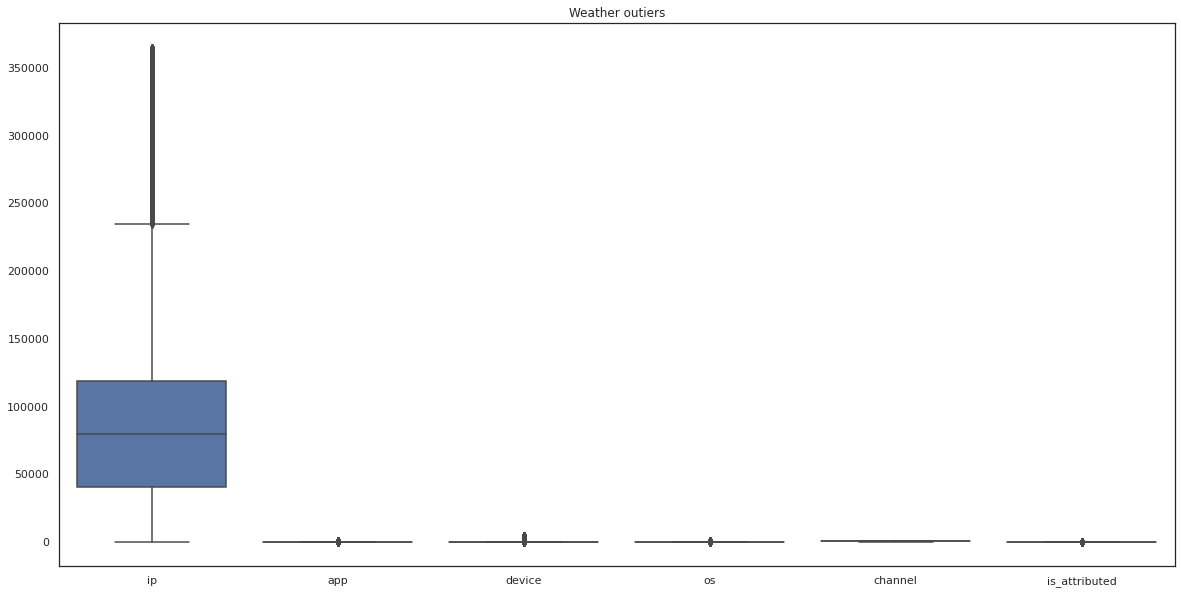

In [16]:
fig,ax=plt.subplots(figsize=(20,10))
sns.boxplot(data=data[['ip', 'app', 'device', 'os', 'channel', 'is_attributed']])
ax.set_title('Weather outiers')
plt.show()

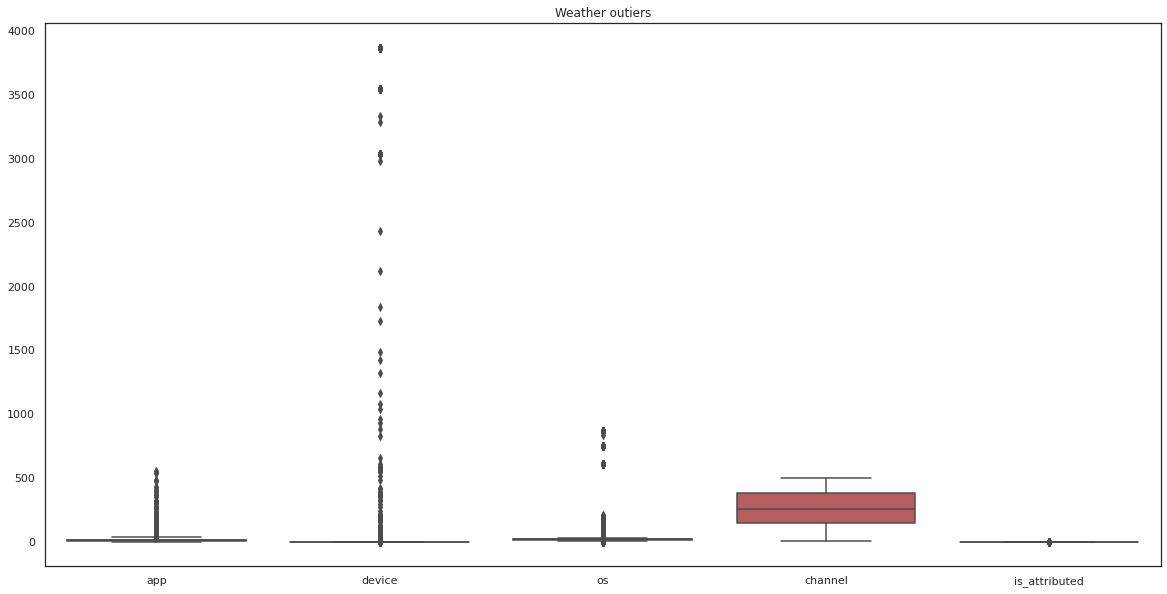

In [17]:
fig,ax=plt.subplots(figsize=(20,10))
sns.boxplot(data=data[['app', 'device', 'os', 'channel', 'is_attributed']])
ax.set_title('Weather outiers')
plt.show()

In [18]:
data.device

0        1
1        1
2        1
3        1
4        1
        ..
99995    1
99996    1
99997    1
99998    1
99999    1
Name: device, Length: 100000, dtype: int64

**Distribution of 'app'**

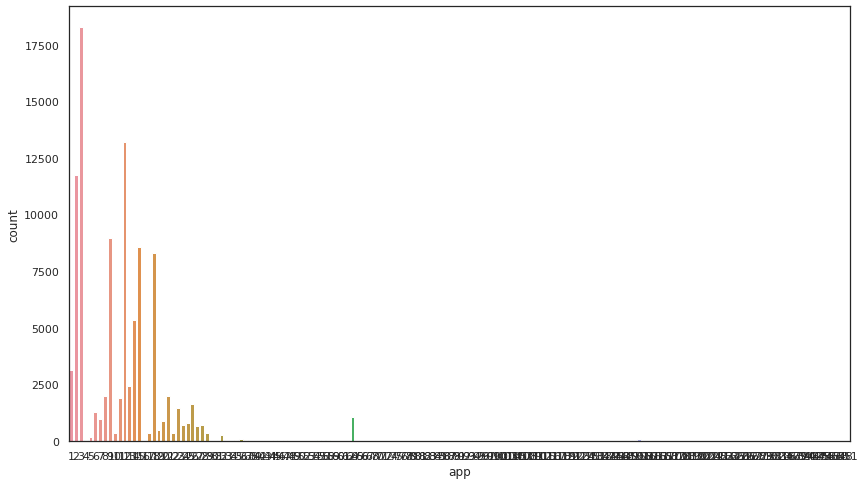

In [19]:
plt.figure(figsize=(14, 8))
sns.countplot(x="app", data=data)

**Distribution of 'device'**

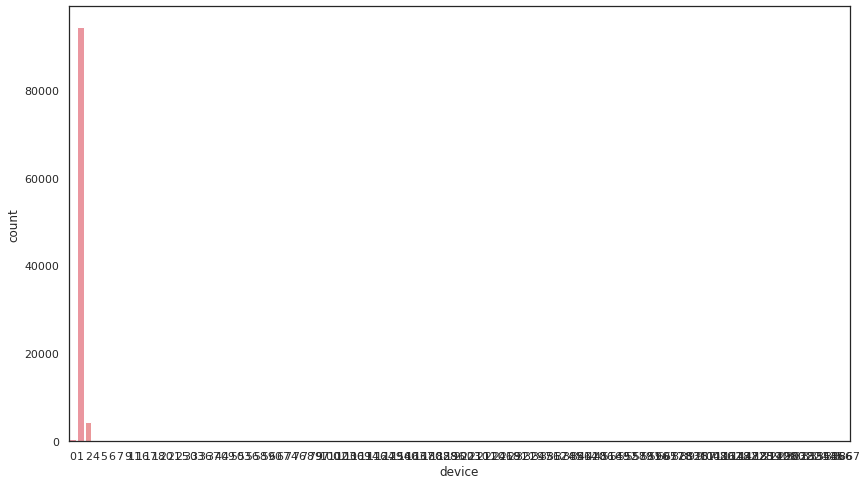

In [20]:
plt.figure(figsize=(14, 8))
sns.countplot(x="device", data=data)

**Various 'channels' get clicks in comparable quantities**

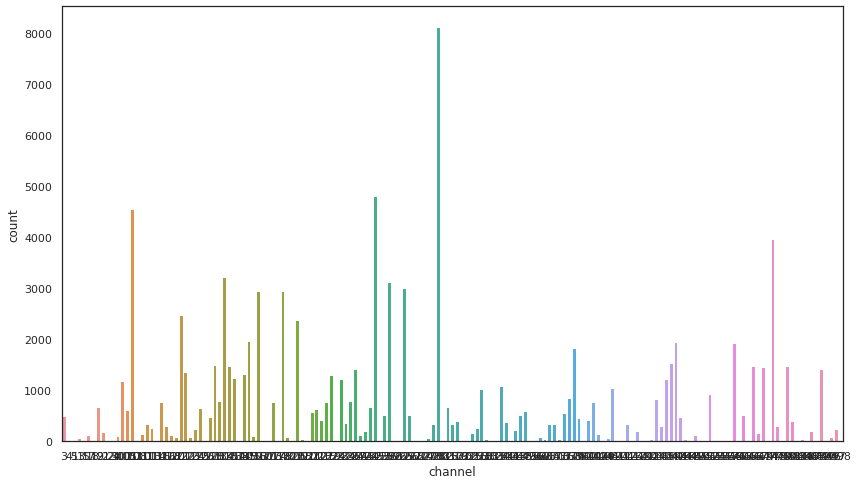

In [21]:
plt.figure(figsize=(14, 8))
sns.countplot(x="channel", data=data)

**Most used OS (Andriod and iOS)**

In [22]:
data['os'].unique()

array([ 13,  17,  19,   1,  25,  22,  20,   2,  90,  10,  18,  40,  15,
        27,  23,  53,  49,  37,  26,  41,   8,  11,   9,  14,  28,  47,
         3,   6,  97,   4,  31,  16,  30,  32,  12,  46, 866,  65,  55,
        29,  42,  39,  34, 607,  79,  35,  44,   7,   0, 748,  36,  99,
        43,  21,  64,  58,  50,  24,  66,  57, 109,  70,  98, 836,  56,
       108,  76, 137,  48,   5,  38,  63, 100,  62,  96,  88,  73,  74,
       138,  45,  84,  52,  61, 172,  59,  81, 102,  77,  78,  60, 153,
        80, 118,  69,  85, 151,  68, 178, 113, 192, 135, 198,  83, 112,
        67, 132,  71, 142, 117, 111, 168, 106, 110, 129, 127, 107, 152,
       155, 199, 133, 116,  92, 196,  87, 174, 207, 184, 114, 185, 193])

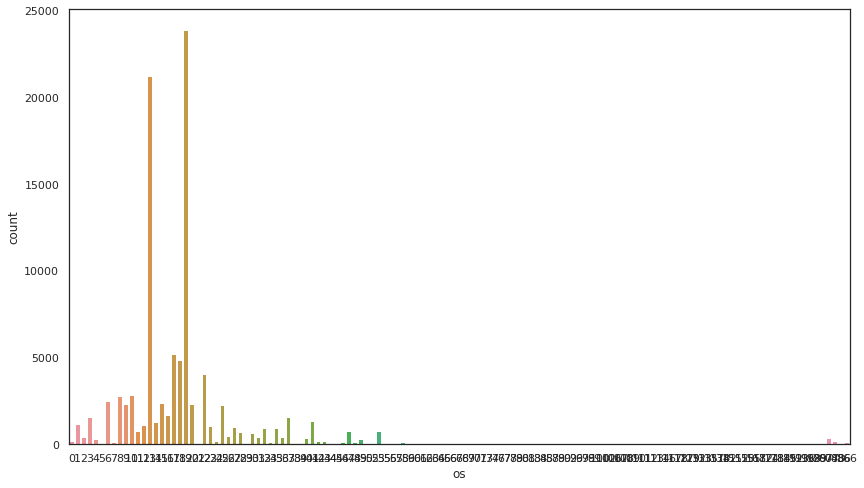

In [23]:
plt.figure(figsize=(14, 8))
sns.countplot(x="os", data=data)

**Exploring the Data - Segmented Univariate Analysis**

In [24]:
apps = data.groupby('app').size().reset_index(name='count')
apps = apps[apps['count']>apps['count'].quantile(0.80)]
apps = apps.merge(data, on='app', how='inner')
apps.head()

,app,count,ip,device,os,channel,is_attributed,Month,Year,Day,Hour
0,1,3135,17059,1,17,135,0,11,2017,9,1
1,1,3135,52432,1,13,115,0,11,2017,7,17
2,1,3135,89242,1,27,124,0,11,2017,7,9
3,1,3135,123994,1,19,101,0,11,2017,9,14
4,1,3135,34067,1,15,134,0,11,2017,7,15


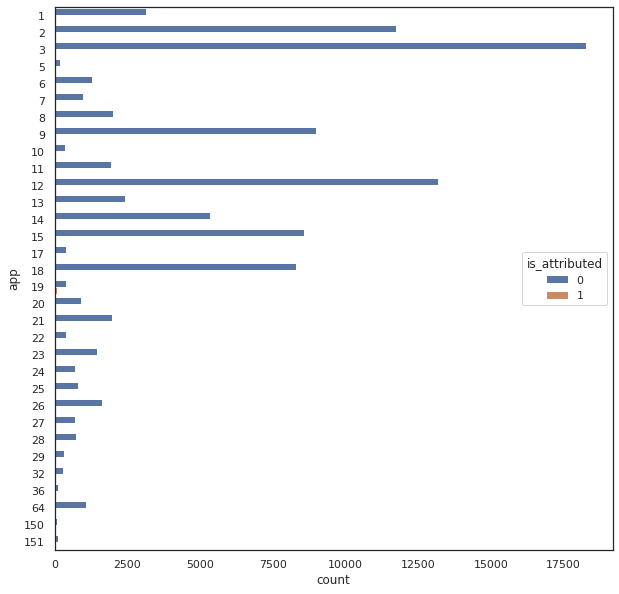

In [25]:
plt.figure(figsize=(10,10))
sns.countplot(y="app", hue="is_attributed", data=apps)

**Plotting the coorelation matrix**

In [30]:
data_no_time = data.drop(['Day', 'Month', 'Year'], axis=1)

Correlation between variables: 


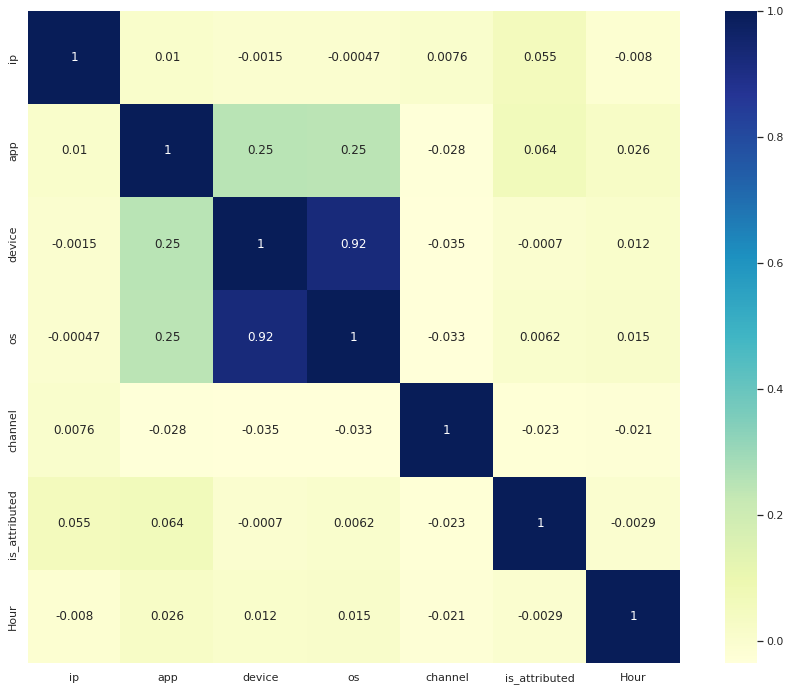

In [31]:
print("Correlation between variables: ")
corr=data_no_time.corr()
plt.figure(figsize=(16,12))
sns.heatmap(corr,annot=True,cmap="YlGnBu",square=True)

**After visualizing the data, we start working on preparing it for algorithms**
____________________________________________________________

**Splitting of Data into Training and Test Datasets**

In [32]:
df1=data['is_attributed']

In [33]:
X = data.drop(['is_attributed'],axis=1)
y = df1

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

from xgboost import XGBClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [36]:
print(y_train.mean())
print(y_test.mean())

0.002375
0.00185


In [37]:
from sklearn.metrics import confusion_matrix

In [38]:
import imblearn
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X, y)
print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

Shape of X before SMOTE: (100000, 9)
Shape of X after SMOTE: (199546, 9)


In [39]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
model = LogisticRegression()
X_train,X_test,y_train,y_test=train_test_split(X_sm,y_sm,test_size=0.75)
model.fit(X_train, y_train)
preds=model.predict(X_test)

**Make the confusion matrix, check for True Positives, False Positives, False Negatives, and True negatives**

In [45]:
cm = confusion_matrix(y_test, predictions)
print(cm)

[[61790 13120]
 [15349 59401]]


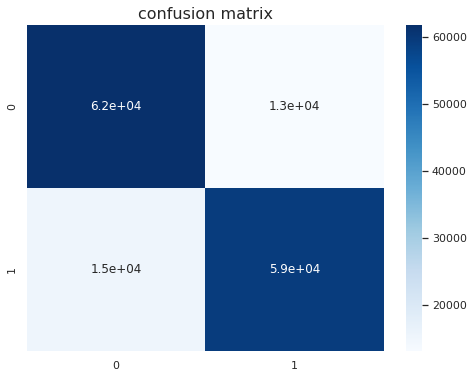

In [46]:
plt.figure(figsize=(8,6))
plt.title('confusion matrix', size=16)
sns.heatmap(cm, cmap='Blues', annot=True)

In [44]:
predictions = model.predict(X_test)

**Apply Adaboost Ensemble Algorithm**

In [47]:
from sklearn.ensemble import AdaBoostClassifier

abcl = AdaBoostClassifier( n_estimators= 20)
abcl = abcl.fit(X_train, y_train)

test_pred = abcl.predict(X_test)
abcl_score=abcl.score(X_test, y_test)
print("The Adaboost Ensemble model accuracy is {}".format(abcl_score))
print("The confusion matrix of Adaboost Ensemble model is")
print(metrics.confusion_matrix(y_test,test_pred))

The Adaboost Ensemble model accuracy is 0.9259454764132032
The confusion matrix of Adaboost Ensemble model is
[[68440  6470]
 [ 4613 70137]]


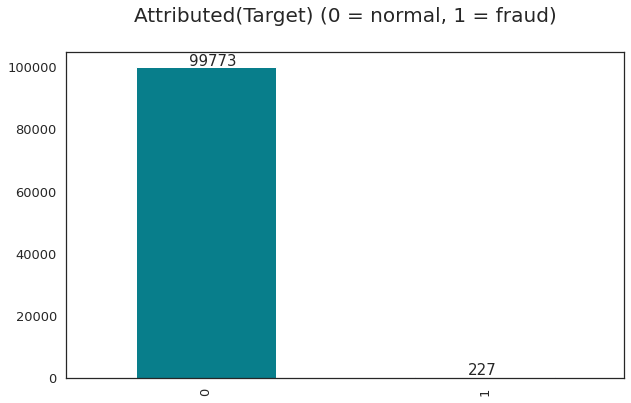

In [48]:
ax = data['is_attributed'].value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13, color='#087E8B')
ax.set_title('Attributed(Target) (0 = normal, 1 = fraud)', size=20, pad=30)


for i in ax.patches:
    ax.text(i.get_x() + 0.19, i.get_height() + 700, str(round(i.get_height(), 2)), fontsize=15)


**Apply the Random forest model**

In [49]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(criterion = 'entropy', class_weight={0:.5,1:.5}, max_depth = 5, min_samples_leaf=5)
rfcl = rfcl.fit(X_train, y_train)
test_pred = rfcl.predict(X_test)
rfcl_score=rfcl.score(X_test , y_test)
print("The Random forest model accuracy is {}".format(rfcl_score))
print("The confusion matrix of Random Forest Model is")
print(metrics.confusion_matrix(y_test,test_pred))

The Random forest model accuracy is 0.9344447414138715
The confusion matrix of Random Forest Model is
[[69850  5060]
 [ 4751 69999]]


**Apply Bagging Classifier Algorithm**

In [50]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=10, max_samples= .7, bootstrap=True)
bgcl = bgcl.fit(X_train, y_train)
test_pred = bgcl.predict(X_test)
bgcl_score=bgcl.score(X_test, y_test)
print("The Bagging classifier model accuracy is {}".format(bgcl_score))
print("The confusion matrix of Bagging classifier model is")
print(metrics.confusion_matrix(y_test,test_pred))

The Bagging classifier model accuracy is 0.9933181878925564
The confusion matrix of Bagging classifier model is
[[74303   607]
 [  393 74357]]


**Apply GradientBoost Classifier Algorithm**

In [51]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.05)
gbcl = gbcl.fit(X_train, y_train)
test_pred = gbcl.predict(X_test)
gbcl_score=gbcl.score(X_test , y_test)
print("The Gradient Boost classifier model accuracy is {}".format(gbcl_score))
print("The confusion matrix of Gradient Boost classifier model is")
print(metrics.confusion_matrix(y_test,test_pred))

The Gradient Boost classifier model accuracy is 0.9281638380328745
The confusion matrix of Gradient Boost classifier model is
[[69496  5414]
 [ 5337 69413]]


In [52]:
print("The Random forest model accuracy is {}".format(rfcl_score))
print("The Adaboost Ensemble model accuracy is {}".format(abcl_score))
print("The Bagging classifier model accuracy is {}".format(bgcl_score))
print("The Gradient Boost classifier model accuracy is {}".format(gbcl_score))

The Random forest model accuracy is 0.9344447414138715
The Adaboost Ensemble model accuracy is 0.9259454764132032
The Bagging classifier model accuracy is 0.9933181878925564
The Gradient Boost classifier model accuracy is 0.9281638380328745


In [53]:
import imblearn
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X, y)
print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

Shape of X before SMOTE: (100000, 9)
Shape of X after SMOTE: (199546, 9)


**Oversampling with SMOTE**

In [54]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  139706
Number of no subscription in oversampled data 0
Number of subscription 0
Proportion of no subscription data in oversampled data is  0.0
Proportion of subscription data in oversampled data is  0.0


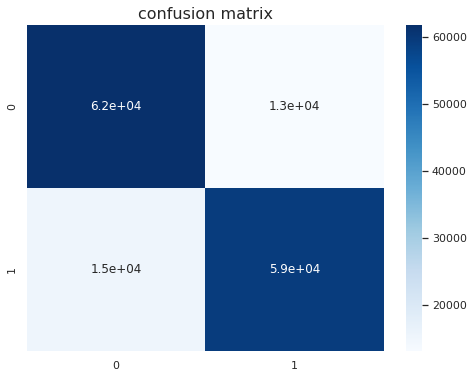

In [55]:
plt.figure(figsize=(8,6))
plt.title('confusion matrix', size=16)
sns.heatmap(cm, cmap='Blues', annot=True)